<a href="https://colab.research.google.com/github/myandelaepu/kyce-tech/blob/master/knn_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(18, 2) (18,)
prediction: ['Jazz' 'Acoustic' 'Dance' 'Dance' 'Classical' 'Classical']


<function matplotlib.pyplot.show(close=None, block=None)>

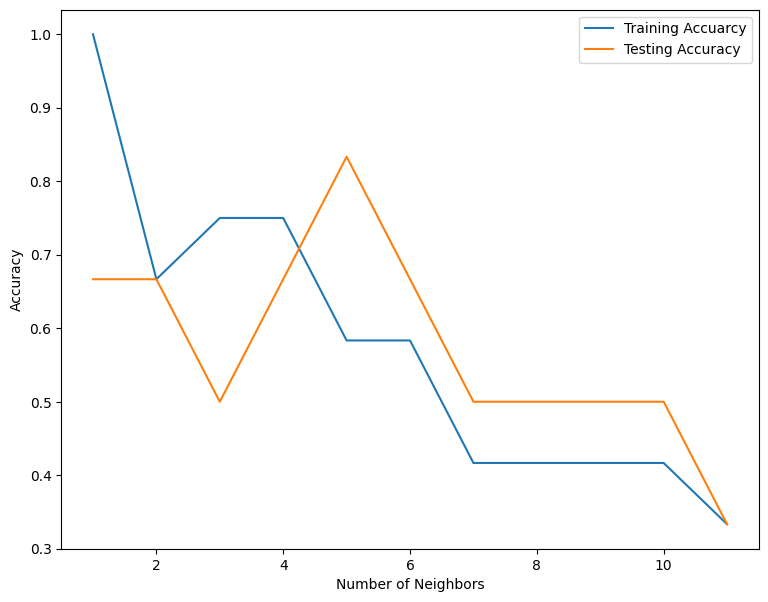

In [5]:
from sklearn import neighbors
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# loading the dataset
music_df = pd.read_csv('music.csv')
n_sample = music_df.shape[0]

# Creating the feature and target varaible
X = music_df[['age', 'gender']].values
y = music_df['genre'].values
print(X.shape, y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21, stratify = y)

# creating an instance of the KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Making predictions
y_pred = knn.predict(X_test)
print ('prediction: {}'.format(y_pred))

# predicting the accuracy
accuracy_score = knn.score(X_test, y_test)
accuracy_score # inspecting the accuarcy of the prediction

# test of model complexity and over/underfitting
train_accuaracy = {} # define the variable for the training accuarcy
test_accuracy = {} # define the variable for the test accuarcy
neighbors = np.arange(1,12)
for n in neighbors:
  knn = KNeighborsClassifier(n_neighbors= n)
  knn.fit(X_train, y_train)
  train_accuaracy[n] = knn.score(X_train, y_train)
  test_accuracy[n] = knn.score(X_test, y_test)

# Plotting the KNN training and testing accuracy
plt.figure(figsize=(9,7))
plt.plot(neighbors, train_accuaracy.values(), label = "Training Accuarcy")
plt.plot(neighbors, test_accuracy.values(), label = "Testing Accuracy")
plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.show



In [7]:
# Confusion Matrix in Scikit-Learn
from sklearn.metrics import classification_report, confusion_matrix
knn = KNeighborsClassifier(n_neighbors=7)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1 0 0 0 0]
 [0 3 0 0 0]
 [0 0 0 0 0]
 [0 0 2 0 0]
 [1 1 0 0 0]]
              precision    recall  f1-score   support

    Acoustic       0.50      1.00      0.67         1
   Classical       0.75      1.00      0.86         3
       Dance       0.00      0.00      0.00         0
      HipHop       0.00      0.00      0.00         2
        Jazz       0.00      0.00      0.00         2

    accuracy                           0.50         8
   macro avg       0.25      0.40      0.30         8
weighted avg       0.34      0.50      0.40         8



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.